In [63]:
import yaml
import pandas as pd

from alpaca.data.historical.stock import StockBarsRequest,StockHistoricalDataClient
from alpaca.data.timeframe import TimeFrame
from alpaca.trading.client import TradingClient

from datetime import datetime

In [33]:
base_url = 'https://paper-api.alpaca.markets'

In [34]:
with open('../config.yaml', 'r') as file:
    config = yaml.safe_load(file)
    secret_key = config['secret_key']
    api_key = config['api_key']

In [ ]:
trading_client = TradingClient(api_key=api_key, secret_key=secret_key, paper=True, url_override=base_url)
# trading_client.get_account()

In [71]:
def get_prev_data(ticker='SPY',start_year=2024):
    start_dt = datetime(start_year,1,1,0,0,0,0)
    request_params = StockBarsRequest(
                        symbol_or_symbols=ticker,
                        timeframe=TimeFrame.Minute,
                        start=start_dt,
                        end=datetime.now().replace(day=datetime.now().day -1)
                )
    client = StockHistoricalDataClient(api_key,secret_key)
    return client.get_stock_bars(request_params).df

In [72]:
spy_df = get_prev_data()

In [73]:
spy_df

open      high     low     close  \
symbol timestamp                                                         
SPY    2024-01-02 09:00:00+00:00  476.2500  476.3600  476.00  476.3100   
       2024-01-02 09:01:00+00:00  476.3400  476.3400  476.29  476.2900   
       2024-01-02 09:02:00+00:00  476.2900  476.2900  476.28  476.2800   
       2024-01-02 09:03:00+00:00  476.2700  476.2700  476.27  476.2700   
       2024-01-02 09:05:00+00:00  476.2000  476.2000  476.19  476.1900   
...                                    ...       ...     ...       ...   
       2025-05-09 15:46:00+00:00  564.9300  565.0099  564.62  564.8003   
       2025-05-09 15:47:00+00:00  564.8300  564.9299  564.70  564.8200   
       2025-05-09 15:48:00+00:00  564.8500  565.1031  564.82  564.8500   
       2025-05-09 15:49:00+00:00  564.8599  564.9399  564.56  564.9399   
       2025-05-09 15:50:00+00:00  564.9100  565.3700  564.78  565.1800   

                                    volume  trade_count        vwap  
symbol timestamp                                                     
SPY    2024-01-02 09:00:00+00:00   20460.0         84.0  476.301058  
       2024-01-02 09:01:00+00:00    6369.0         16.0  476.320154  
       2024-01-02 09:02:00+00:00    6152.0         10.0  476.280164  
       2024-01-02 09:03:00+00:00     369.0         10.0  476.270000  
       2024-01-02 09:05:00+00:00     547.0          8.0  476.192404  
...                                    ...          ...         ...  
       2025-05-09 15:46:00+00:00   54660.0        882.0  564.827575  
       2025-05-09 15:47:00+00:00   47008.0        603.0  564.800338  
       2025-05-09 15:48:00+00:00   52063.0        790.0  564.984451  
       2025-05-09 15:49:00+00:00   34181.0        621.0  564.716217  
       2025-05-09 15:50:00+00:00  129157.0       1774.0  565.109192  

[270423 rows x 7 columns]

In [74]:
vixy_df = get_prev_data('VIXY')

In [75]:
vixy_df

open   high    low    close  volume  \
symbol timestamp                                                         
VIXY   2024-01-02 09:03:00+00:00  15.40  15.40  15.40  15.4000   150.0   
       2024-01-02 10:10:00+00:00  15.50  15.50  15.50  15.5000  5000.0   
       2024-01-02 11:32:00+00:00  15.70  15.70  15.70  15.7000   100.0   
       2024-01-02 11:34:00+00:00  15.73  15.73  15.73  15.7300   268.0   
       2024-01-02 11:44:00+00:00  15.77  15.77  15.77  15.7700   121.0   
...                                 ...    ...    ...      ...     ...   
       2025-05-09 15:46:00+00:00  58.61  58.63  58.60  58.6300   823.0   
       2025-05-09 15:48:00+00:00  58.56  58.56  58.55  58.5500  1400.0   
       2025-05-09 15:49:00+00:00  58.54  58.54  58.54  58.5400   168.0   
       2025-05-09 15:50:00+00:00  58.55  58.58  58.50  58.5075  5316.0   
       2025-05-09 15:51:00+00:00  58.47  58.47  58.46  58.4600   312.0   

                                  trade_count       vwap  
symbol timestamp                                          
VIXY   2024-01-02 09:03:00+00:00          1.0  15.400000  
       2024-01-02 10:10:00+00:00          1.0  15.500000  
       2024-01-02 11:32:00+00:00          1.0  15.700000  
       2024-01-02 11:34:00+00:00          1.0  15.730000  
       2024-01-02 11:44:00+00:00          2.0  15.770000  
...                                       ...        ...  
       2025-05-09 15:46:00+00:00         10.0  58.623197  
       2025-05-09 15:48:00+00:00          7.0  58.550833  
       2025-05-09 15:49:00+00:00          7.0  58.540000  
       2025-05-09 15:50:00+00:00         57.0  58.553125  
       2025-05-09 15:51:00+00:00          5.0  58.466310  

[149510 rows x 7 columns]

In [76]:
pd.merge(spy_df,vixy_df,how='inner',on='timestamp').to_csv('spy_vixy.csv')

In [77]:
df = pd.read_csv('spy_vixy.csv')

In [78]:
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

In [79]:
df 

,open_x,high_x,low_x,close_x,volume_x,trade_count_x,vwap_x,open_y,high_y,low_y,close_y,volume_y,trade_count_y,vwap_y
timestamp,,,,,,,,,,,,,,
2024-01-02 09:03:00+00:00,476.2700,476.2700,476.27,476.2700,369.0,10.0,476.270000,15.40,15.40,15.4000,15.4000,150.0,1.0,15.400000
2024-01-02 10:10:00+00:00,475.3300,475.3300,475.33,475.3300,425.0,3.0,475.330000,15.50,15.50,15.5000,15.5000,5000.0,1.0,15.500000
2024-01-02 11:32:00+00:00,473.1100,473.1100,473.03,473.0300,1529.0,19.0,473.056154,15.70,15.70,15.7000,15.7000,100.0,1.0,15.700000
2024-01-02 11:34:00+00:00,473.1500,473.1500,473.02,473.0200,3918.0,25.0,473.041895,15.73,15.73,15.7300,15.7300,268.0,1.0,15.730000
2024-01-02 11:44:00+00:00,472.7600,472.7600,472.75,472.7500,3129.0,17.0,472.755046,15.77,15.77,15.7700,15.7700,121.0,2.0,15.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09 15:45:00+00:00,564.6800,564.9400,564.51,564.8900,70560.0,1057.0,564.711871,58.68,58.72,58.6475,58.6700,2788.0,34.0,58.692864
2025-05-09 15:46:00+00:00,564.9300,565.0099,564.62,564.8003,54660.0,882.0,564.827575,58.61,58.63,58.6000,58.6300,823.0,10.0,58.623197
2025-05-09 15:48:00+00:00,564.8500,565.1031,564.82,564.8500,52063.0,790.0,564.984451,58.56,58.56,58.5500,58.5500,1400.0,7.0,58.550833


array([<Axes: xlabel='Date', ylabel='Close Price'>,
       <Axes: xlabel='Date', ylabel='Close Price'>], dtype=object)

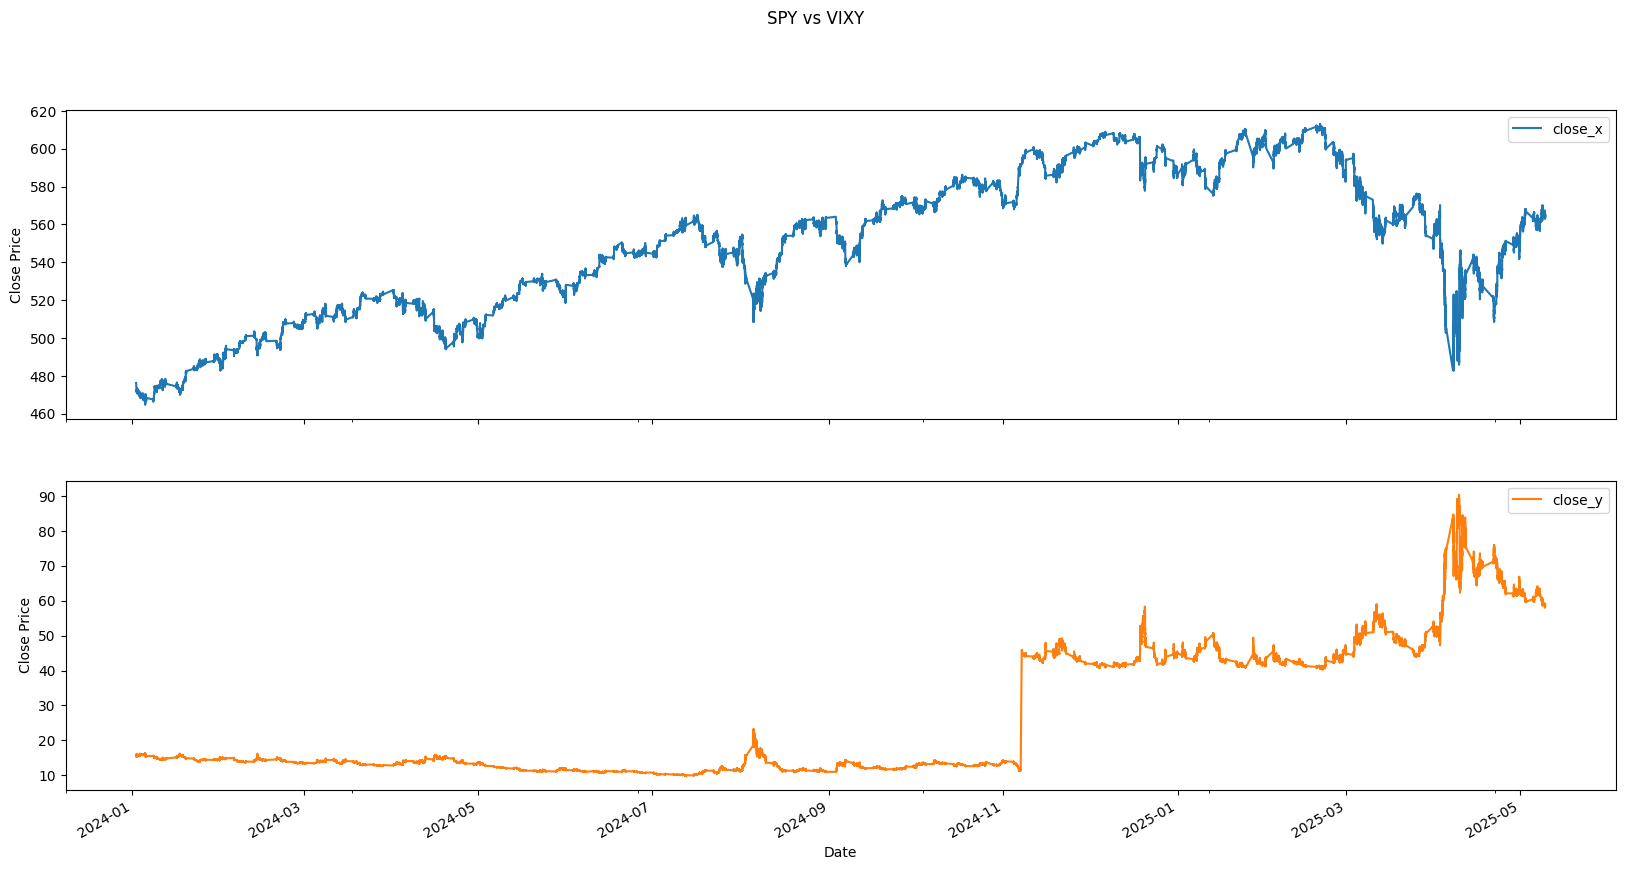

In [80]:
df.plot(y=['close_x','close_y'],title='SPY vs VIXY',ylabel='Close Price',xlabel='Date',figsize=(20,10),subplots=True)   